<a href="https://colab.research.google.com/github/jonathandeng34/digit-classifier/blob/main/Neural_Network_Digit_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torch

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Download Training and Testing Data

In [4]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
trainset = torchvision.datasets.MNIST('PATH_FOR_TRAINING_SET', download=True, train=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size = 64, shuffle = True)

100%|██████████| 9912422/9912422 [00:00<00:00, 115475576.94it/s]


Extracting PATH_FOR_TRAINING_SET/MNIST/raw/train-images-idx3-ubyte.gz to PATH_FOR_TRAINING_SET/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 20270363.76it/s]


Extracting PATH_FOR_TRAINING_SET/MNIST/raw/train-labels-idx1-ubyte.gz to PATH_FOR_TRAINING_SET/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 41347160.16it/s]

Extracting PATH_FOR_TRAINING_SET/MNIST/raw/t10k-images-idx3-ubyte.gz to PATH_FOR_TRAINING_SET/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 11455519.40it/s]


Extracting PATH_FOR_TRAINING_SET/MNIST/raw/t10k-labels-idx1-ubyte.gz to PATH_FOR_TRAINING_SET/MNIST/raw



### Create dataloaders

torch.Size([64, 1, 28, 28])
torch.Size([64])


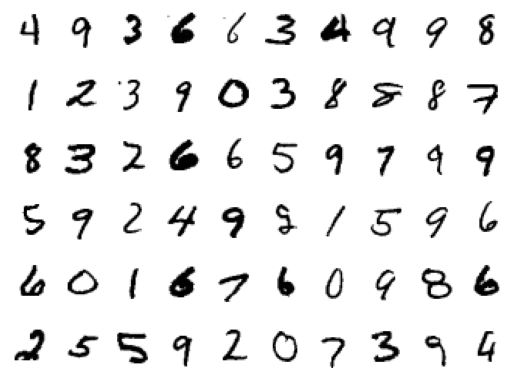

In [5]:
dataiter = iter(trainloader)
images, labels = next(dataiter)

print(images.shape)
print(labels.shape)

figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

### Initialize Model

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Digit_ClassifierX(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1, 32, 3)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(32, 64, 3)

    self.fc1 = nn.Linear(64 * 5 * 5, 128)  # Adjusted input size based on the output of convolutions
    self.fc2 = nn.Linear(128, 10)  # Output size matches the number of classes (10 for MNIST)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1, 64 * 5 * 5)  # flatten tensor before fully connected layers
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    return x


In [7]:
model = Digit_ClassifierX()

### Hyperparameters Tuning

In [11]:
num_epochs = 10
learning_rate = 0.001
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

### Train Model

In [ ]:
running_loss = 0.0

model.train()
for epoch in range(num_epochs):
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 300 == 299:
            print(f"Epoch [{epoch + 1}/{num_epochs}], Batch [{i + 1}], Loss: {running_loss / 300:.4f}")
            running_loss = 0.0

Epoch [1/10], Batch [300], Loss: 0.0149
Epoch [1/10], Batch [600], Loss: 0.0162
Epoch [1/10], Batch [900], Loss: 0.0194
Epoch [2/10], Batch [300], Loss: 0.0125
Epoch [2/10], Batch [600], Loss: 0.0122
Epoch [2/10], Batch [900], Loss: 0.0121
Epoch [3/10], Batch [300], Loss: 0.0113
Epoch [3/10], Batch [600], Loss: 0.0068
Epoch [3/10], Batch [900], Loss: 0.0085
Epoch [4/10], Batch [300], Loss: 0.0090
Epoch [4/10], Batch [600], Loss: 0.0115
Epoch [4/10], Batch [900], Loss: 0.0084
Epoch [5/10], Batch [300], Loss: 0.0055


In [ ]:
torch.save(model.state_dict(), '/content/gdrive/MyDrive/Colab Notebooks/weights.pth')

### Evaluate Test Accuracy

In [ ]:
model.eval()
correct = 0
total = 0

testset = torchvision.datasets.MNIST(root='./data', train=False, download = True, transform = transform)

testloader = torch.utils.data.DataLoader(testset, batch_size = 64, shuffle=False, num_workers = 2)

with torch.no_grad():
  for images, labels in testloader:
    for i in range(len(labels)):

      output = model(images[i])

      predicted_label = torch.argmax(output)

      if predicted_label == labels[i]:
        correct += 1
      total += 1

print("Test accuracy: ", correct/total)